## Data

<IPython.core.display.Javascript object>


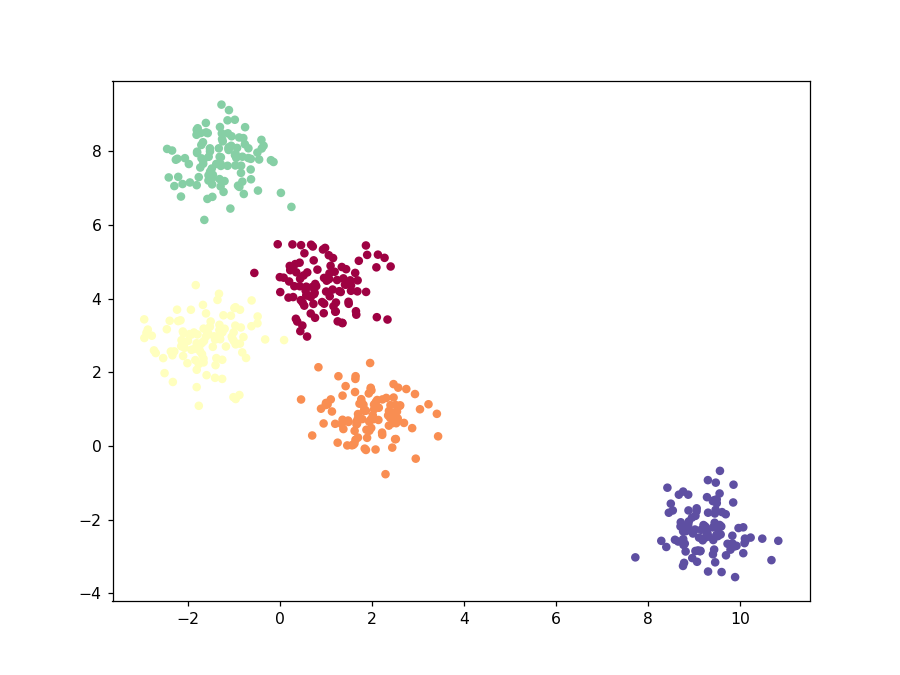

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)   

## Single linkage

<IPython.core.display.Javascript object>


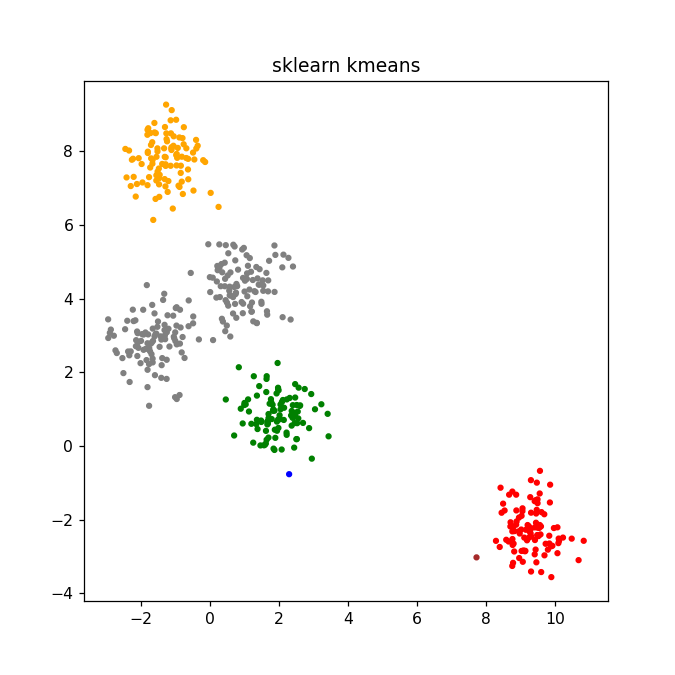

Text(0.5, 1.0, 'sklearn kmeans')

In [2]:
from sklearn.cluster import AgglomerativeClustering

points = X
clf = AgglomerativeClustering(n_clusters=6, linkage= 'single') 
predicted = clf.fit_predict(points)

colors=  np.array(['green','grey', 'orange', 'brown', 'red', 'blue'])
plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 
plt.title ('sklearn kmeans')

## Complete linkage

<IPython.core.display.Javascript object>


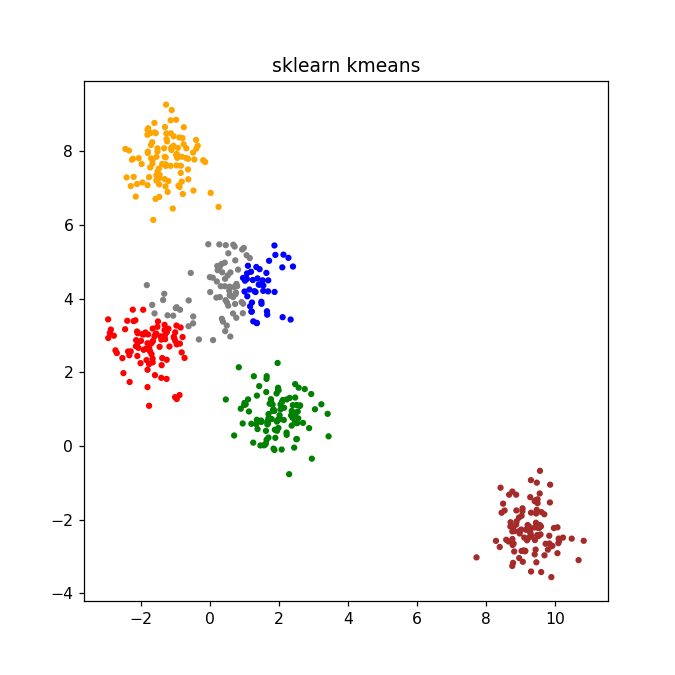

Text(0.5, 1.0, 'sklearn kmeans')

In [3]:
points = X
clf = AgglomerativeClustering(n_clusters=6, linkage= 'complete') 
predicted = clf.fit_predict(points)

colors=  np.array(['green','grey', 'orange', 'brown', 'red', 'blue'])
plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 
plt.title ('sklearn kmeans')

## DBSCAN

n_clusters_and_noice =6

[0 1 1 1 1 2 1 2 0 0 3 1 1 3 1 2 1 2 1 1 0 2 4 1 0 3 0 0 3 1 0 1 1 3 1 0 0
 2 2 2 3 2 1 4 1 1 2 1 0 3 1 2 0 6 2 1 2 2 3 1 6 2 0 1 1 3 1 3 1 1 1 0 1 2
 1 1 0 0 1 0 1 3 1 1 2 0 2 1 1 1 1 3 3 1 2 0 0 1 3 1 6 3 3 0 5 1 2 0 0 1 1
 1 0 2 2 3 3 3 0 2 2 6 1 3 1 1 2 1 3 3 5 0 1 2 3 2 2 2 1 1 0 3 0 1 0 2 6 3
 6 1 1 3 3 0 1 1 1 1 3 1 3 2 1 1 0 0 1 0 2 0 1 1 2 2 0 3 1 3 1 3 1 3 3 6 1
 2 0 1 3 2 3 0 2 1 0 1 1 2 3 3 0 3 1 3 3 0 2 1 1 1 2 3 1 3 2 3 2 0 0 1 0 1
 2 2 2 1 1 2 2 1 0 1 1 3 3 1 3 1 2 1 0 1 3 2 0 0 3 3 0 2 2 1 0 0 1 1 6 1 1
 3 2 1 3 0 1 1 2 0 1 1 1 3 1 0 3 0 3 0 3 3 1 0 0 0 1 0 3 1 3 2 1 1 1 1 0 2
 3 1 2 3 2 1 0 0 3 1 2 0 0 3 2 3 1 2 1 1 1 2 2 2 3 3 1 0 1 3 2 2 0 0 3 1 0
 1 1 1 1 3 0 2 1 1 1 2 0 0 0 3 1 4 1 0 1 1 0 0 1 1 1 2 1 1 2 1 1 0 1 0 3 3
 0 1 2 1 0 0 2 1 3 1 2 2 6 2 2 3 3 2 1 3 3 3 1 2 2 2 2 0 3 0 1 1 2 0 0 1 1
 1 1 3 2 1 2 3 1 1 2 3 1 0 2 1 3 1 0 1 1 3 0 1 1 2 3 0 3 0 1 3 0 3 0 2 1 1
 3 0 0 1 1 1 1 1 2 1 1 0 2 1 3 1 2 3 1 2 1 1 3 1 1 1 2 1 3 0 1 1 3 2 1 2 1


<IPython.core.display.Javascript object>


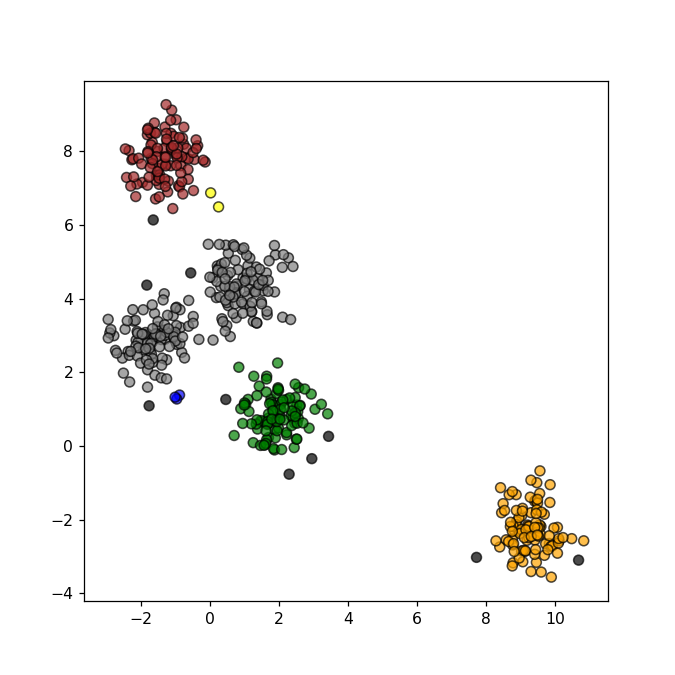

In [9]:
from sklearn.cluster import DBSCAN

def apply_db_scan(points, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

predicted  =  apply_db_scan(points, eps=0.5)
print (predicted)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(points[:,0], points[:,1], c= colors[predicted], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)  

## Elbow Method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<IPython.core.display.Javascript object>


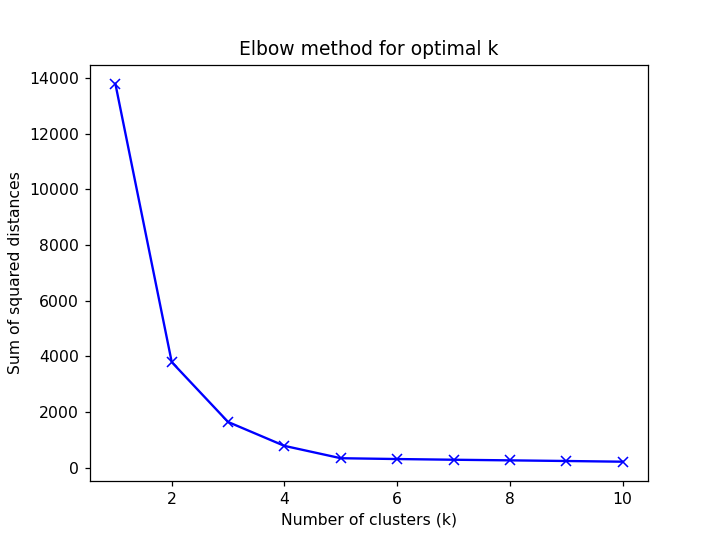

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [12]:
from sklearn.cluster import KMeans

ssd = []

# Fit KMeans clustering models for cluster numbers ranging from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
# Plot the sum of squared distances for each number of clusters
plt.plot(range(1, 11), ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
%matplotlib -l
plt.show()
